In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('tcc_ceds_music.csv')

Xall=data.drop(['Unnamed: 0','artist_name','track_name','lyrics','len','loudness','topic','age'],axis=1)


#show how many release dates are before 1990
print(len(Xall[Xall['release_date']<=1990]))

#show how many release dates are after1990
print(len(Xall[Xall['release_date']>1990]))

#if song is <=1990, make encodedDate = -1, else make encodedDate = 1
Xall['encodedDate']=np.where(Xall['release_date']<=1990,0,1)


Xall=Xall.drop(['release_date'],axis=1)

#one hot encode the genre
Xall=pd.get_dummies(Xall,columns=['genre'])

print(Xall.keys())

y=Xall['encodedDate']

Xall=Xall.drop(['encodedDate'],axis=1)

#make y -1 if negative, +1 if positive
y_all=np.sign(y)

print(y.head())




13915
14457
Index(['dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'like/girls', 'sadness', 'feelings', 'danceability', 'acousticness',
       'instrumentalness', 'valence', 'energy', 'encodedDate', 'genre_blues',
       'genre_country', 'genre_hip hop', 'genre_jazz', 'genre_pop',
       'genre_reggae', 'genre_rock'],
      dtype='object')
0    0
1    0
2    0
3    0
4    0
Name: encodedDate, dtype: int64


In [3]:

print('number of songs before ',len(y[y==0]))
print('number of songs after ',len(y[y==1]))

number of songs before  13915
number of songs after  14457


In [4]:

#print statistics on X


#split into test and train with 20% test

from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(Xall,y_all,test_size=.2, random_state=1)
print(X.keys())
X=X.values
y=y.values

## FROM NOW ON ONLY USE X AND y


import mlrose_hiive as mlrose
import matplotlib.pyplot as plt

Index(['dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'like/girls', 'sadness', 'feelings', 'danceability', 'acousticness',
       'instrumentalness', 'valence', 'energy', 'genre_blues', 'genre_country',
       'genre_hip hop', 'genre_jazz', 'genre_pop', 'genre_reggae',
       'genre_rock'],
      dtype='object')


0
1
2
3
4


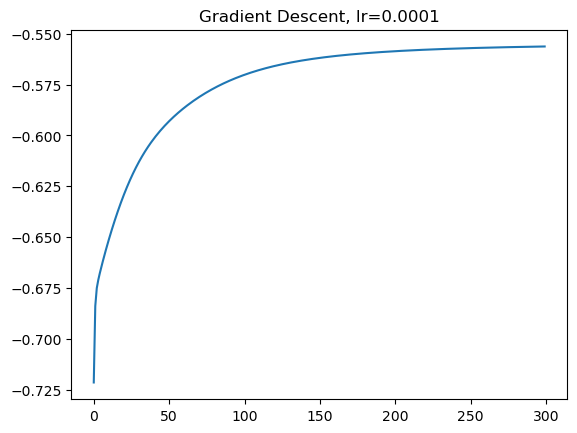

0.7236198616557254
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]]
0.7228193832599119


In [11]:

schedule=mlrose.ExpDecay(init_temp=3, exp_const=0.000021, min_temp=0.001)
AVERAGINGOUTRANDOM=5
MAXATT=1
GRAPHLEN=300
final=[]
nn_model1=None
for i in range(AVERAGINGOUTRANDOM):
    print(i)
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10], activation = 'sigmoid', \
                                 algorithm = 'gradient_descent', max_iters = GRAPHLEN,pop_size=40, \
                                 bias = True, is_classifier = True, learning_rate = 0.0001, \
                                 early_stopping = False, clip_max = 3, max_attempts = MAXATT, \
                                 random_state = AVERAGINGOUTRANDOM,schedule=schedule,curve=True)
    
    nn_model1.fit(X, y)
    curve=nn_model1.fitness_curve

    if(final==[]):
        final=np.array(curve)
    else:
        final+=np.array(curve)


plt.plot(final/AVERAGINGOUTRANDOM)
plt.title('Gradient Descent, lr=0.0001')
plt.show()



from sklearn.metrics import accuracy_score

# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X)

y_train_accuracy = accuracy_score(y, y_train_pred)

print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test)
#print 10 predictions
print(y_test_pred[:10])

y_test_accuracy = accuracy_score(y_test, y_test_pred)

print(y_test_accuracy)





(500,)


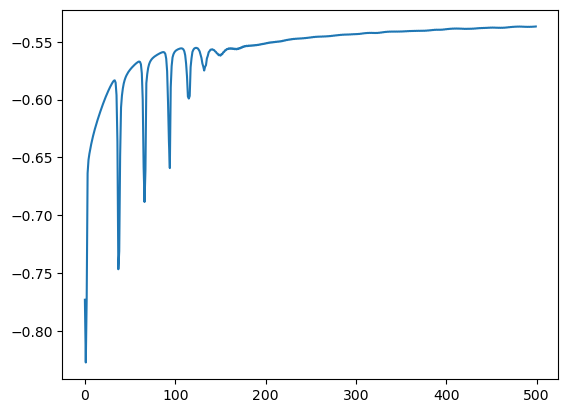

In [79]:
#Plot nn_model1 fitness curve
print(nn_model0.fitness_curve.shape)
plt.plot(nn_model0.fitness_curve)
#axis between -1 and 1


plt.show()

21
[0.76873664 0.74513714 0.74471215 0.74471215 0.66867794 0.66867794
 0.66867794 0.66867794 0.66867794 0.64748446 0.64748446 0.64748446
 0.64748446 0.64748446 0.64748446 0.64488069 0.64488069 0.64488069
 0.64488069 0.64488069 0.63470887 0.63470887 0.63470887 0.63470887
 0.63470887 0.63470887 0.63470887 0.63470887 0.63470887 0.63470887
 0.63414567 0.63414567 0.63414567 0.63414567 0.63414567 0.63414567
 0.63414567 0.62275539 0.62275539 0.62275539 0.62275539 0.62275539
 0.62275539 0.62275539 0.62275539 0.62275539 0.62275539 0.62275539
 0.62275539 0.62275539]


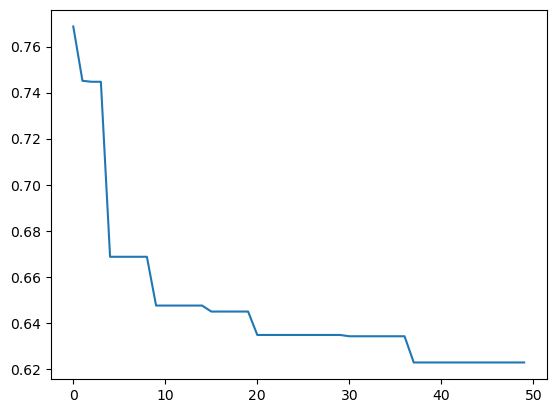

0.6414504119487157
[[0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]]
0.6526872246696035


In [12]:

schedule=mlrose.ExpDecay(init_temp=3, exp_const=0.000021, min_temp=0.001)
AVERAGINGOUTRANDOM=1
MAXATT=1
GRAPHLEN=50
final=[]
nn_model1=None
for i in [21]:
    print(i)
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg', max_iters = GRAPHLEN,pop_size=40, \
                                 bias = True, is_classifier = True, learning_rate = 0.14, \
                                 early_stopping = False, clip_max = 3, max_attempts = MAXATT, \
                                 random_state = AVERAGINGOUTRANDOM,schedule=schedule,curve=True)
    
    nn_model1.fit(X, y)
    curve=[x for x,y in nn_model1.fitness_curve]

    if(final==[]):
        final=np.array(curve)
    else:
        final+=np.array(curve)

print(final)
plt.plot(final/AVERAGINGOUTRANDOM)
plt.show()



from sklearn.metrics import accuracy_score

# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X)

y_train_accuracy = accuracy_score(y, y_train_pred)

print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test)
#print 10 predictions
print(y_test_pred[:10])

y_test_accuracy = accuracy_score(y_test, y_test_pred)

print(y_test_accuracy)





In [68]:
nn_model1bis = mlrose.NeuralNetwork(hidden_nodes = [10], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg', max_iters = 2,pop_size=40, \
                                 bias = True, is_classifier = True, learning_rate = 0.14, \
                                 early_stopping = False, clip_max = 3, max_attempts = MAXATT, \
                                 random_state = 21,schedule=schedule,curve=True)

#4 iterations : 0.57
#8 iter : 0.54
# 12 iter : 0.56
# 16 iter : 0.59
#

nn_model1bis.fit(X, y)
y_test_pred=nn_model1bis.predict(X_test)
#print 10 predictions
print(y_test_pred[:10])

y_test_accuracy = accuracy_score(y_test, y_test_pred)

print(y_test_accuracy)

[[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]
0.574273127753304


In [ ]:

print(curve)


[5.213667568340926, 5.156168372753507, 5.156168372753507, 4.250201912420471]


0
[0.96133803 0.96145003 0.95909892 ... 0.54424068 0.54422836 0.5442287 ]


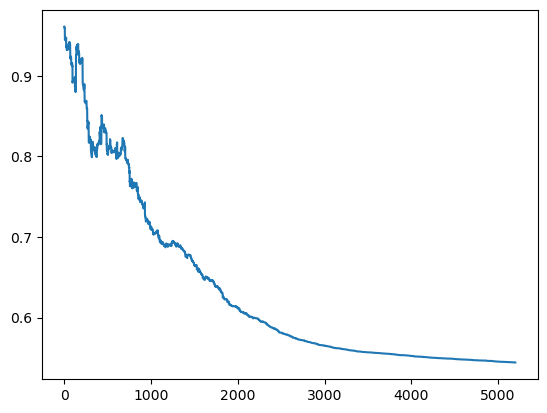

0.728642551879103
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]]
0.7288105726872247


In [10]:

schedule=mlrose.ExpDecay(init_temp=.1, exp_const=0.003, min_temp=0.00001)

AVERAGINGOUTRANDOM=1
MAXATT=1
GRAPHLEN=5200
final=[]
for i in range(AVERAGINGOUTRANDOM):
    print(i)
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = GRAPHLEN,pop_size=40, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = False, clip_max = 3, max_attempts = MAXATT, \
                                 random_state = AVERAGINGOUTRANDOM,schedule=schedule,curve=True)
    
    nn_model1.fit(X, y)
    curve=[x for x,y in nn_model1.fitness_curve]

    if(final==[]):
        final=np.array(curve)
    else:
        final+=np.array(curve)

print(final)
plt.plot(final/AVERAGINGOUTRANDOM)
plt.show()



from sklearn.metrics import accuracy_score

# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X)

y_train_accuracy = accuracy_score(y, y_train_pred)

print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test)
#print 10 predictions
print(y_test_pred[:10])

y_test_accuracy = accuracy_score(y_test, y_test_pred)

print(y_test_accuracy)


In [48]:
#print sample predictions from the model
print(y_test_pred[:10])


[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]


RHC

0
[0.96133803 0.96108352 0.96108352 ... 0.54807621 0.54807329 0.54807329]


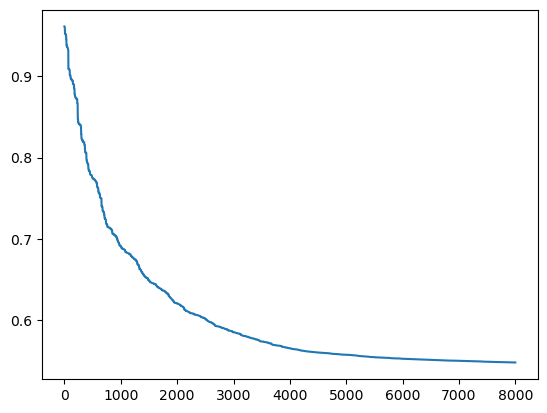

0.7276292020971935
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]]
0.7296916299559472


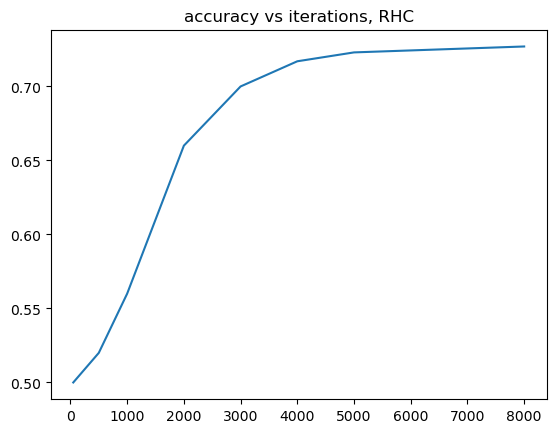

In [15]:



AVERAGINGOUTRANDOM=1
MAXATT=10
GRAPHLEN=8000
final=[]
nn_model1=None
for i in range(AVERAGINGOUTRANDOM):
    print(i)
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = GRAPHLEN,pop_size=40, \
                                 bias = True, is_classifier = True, learning_rate = 0.04, \
                                 early_stopping = False, clip_max = 3, max_attempts = MAXATT, \
                                 random_state = AVERAGINGOUTRANDOM,schedule=schedule,curve=True)
    
    nn_model1.fit(X, y)
    curve=[x for x,y in nn_model1.fitness_curve]

    if(final==[]):
        final=np.array(curve)
    else:
        final+=np.array(curve)

print(final)
plt.plot(final/AVERAGINGOUTRANDOM)
plt.show()



from sklearn.metrics import accuracy_score

# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X)

y_train_accuracy = accuracy_score(y, y_train_pred)

print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test)
#print 10 predictions
print(y_test_pred[:10])

y_test_accuracy = accuracy_score(y_test, y_test_pred)
#after 500 iter : .52 .52
#after 1k iter .56 .56
#AFTER 2k iterations : .66 accu
#after 3k iterations :  .70 on both test and train
#after 4k iterations :  .717 and .714   
#after 5k   : .723 and .719
#after 8k : .727 and .729

#add this to th graph
cp=[50,500,1000,2000,3000,4000,5000,8000]
values=[.50,.52,.56,.66,.70,.717,.723,.727]
plt.title('accuracy vs iterations, RHC')

plt.plot(cp,values)
print(y_test_accuracy)


0
[1.4657184]


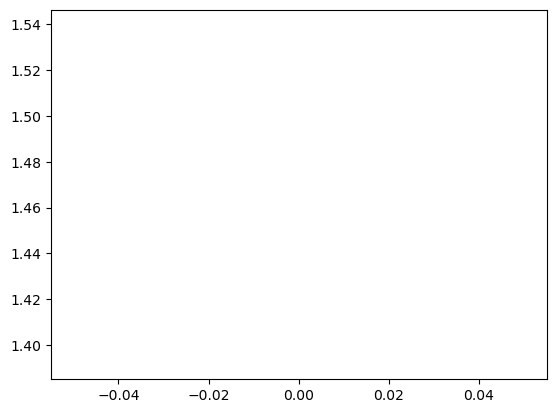

0.4654800193858219
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
0.4558590308370044


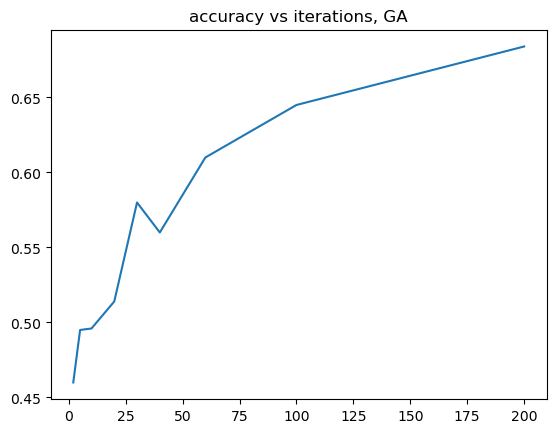

In [109]:



AVERAGINGOUTRANDOM=1
MAXATT=10
GRAPHLEN=1
final=[]
nn_model1=None
for i in range(AVERAGINGOUTRANDOM):
    print(i)
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = GRAPHLEN,pop_size=40, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = False, clip_max = 3, max_attempts = MAXATT, \
                                 random_state = AVERAGINGOUTRANDOM,schedule=schedule,curve=True)
    
    nn_model1.fit(X, y)
    curve=[x for x,y in nn_model1.fitness_curve]

    if(final==[]):
        final=np.array(curve)
    else:
        final+=np.array(curve)

print(final)
plt.plot(final/AVERAGINGOUTRANDOM)
plt.show()



from sklearn.metrics import accuracy_score

# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X)

y_train_accuracy = accuracy_score(y, y_train_pred)

print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test)
#print 10 predictions
print(y_test_pred[:10])

y_test_accuracy = accuracy_score(y_test, y_test_pred)
#after 500 iter : .52 .52
#after 1k iter .56 .56
#AFTER 2k iterations : .66 accu
#after 3k iterations :  .70 on both test and train
#after 4k iterations :  .717 and .714   
#after 5k   : .723 and .719
#after 8k : .727 and .729



print(y_test_accuracy)
#2 : .46,.45
#5 : .495, .49
#10 : .496, .498
#20 : .514, .515
#30 : .58, .59
#40 : .56, .58
#60 : .61, .62
#100 : .645, .641
#200 : .684, .685



#add this to th graph
cp=[2,5,10,20,30,40,60,100,200]
values=[.46,.495,.496,.514,.58,.56,.61,.645,.684]
plt.title('accuracy vs iterations, GA')
plt.plot(cp,values)


In [1]:

schedule=mlrose.ExpDecay(init_temp=1.3, exp_const=0.00021, min_temp=0.001)

AVERAGINGOUTRANDOM=1
MAXATT=10
GRAPHLEN=2400
final=[]
nn_model1=None
for i in range(AVERAGINGOUTRANDOM):
    print(i)
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = GRAPHLEN,pop_size=40, \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = False, clip_max = 3, max_attempts = MAXATT, \
                                 random_state = AVERAGINGOUTRANDOM,schedule=schedule,curve=True)
    
    nn_model1.fit(X, y)
    curve=[x for x,y in nn_model1.fitness_curve]

    if(final==[]):
        final=np.array(curve)
    else:
        final+=np.array(curve)

print(final)
plt.plot(final/AVERAGINGOUTRANDOM)
plt.show()



from sklearn.metrics import accuracy_score

# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X)

y_train_accuracy = accuracy_score(y, y_train_pred)

print(y_train_accuracy)


# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test)
#print 10 predictions
print(y_test_pred[:10])

y_test_accuracy = accuracy_score(y_test, y_test_pred)
#after 500 iter : .52 .52
#after 1k iter .56 .56
#AFTER 2k iterations : .66 accu
#after 3k iterations :  .70 on both test and train
#after 4k iterations :  .717 and .714   
#after 5k   : .723 and .719
#after 8k : .727 and .729

#add this to th graph
cp=[50,500,1000,2000,3000,4000,5000,8000]
values=[.50,.52,.56,.66,.70,.717,.723,.727]
plt.title('accuracy vs iterations, RHC')

plt.plot(cp,values)
print(y_test_accuracy)


NameError: name 'mlrose' is not defined